# Quantum Fourier Transform Cross-Verification

<u>NOTE</u>: Remeber to try to hit **Restart** if something is wrong and then **Run All** again.

## Introduction
This module run experiments of QFT algorithm on different Quantum Computing platform and compare the correctness of each random input configuration to each quantum computing platform. 

Each module based on a specific quantum computing platform must implement a function such that it takes parameters:
-   A number of qubits used.
-   A random configuration of a bitstring of 0's and 1's input state.
-   A number of shots for each configuration run.

And returns:
-   A map of counts of each measurement outcome correspond to a configuration input state.

Optional: Print the circuit out in the function

This module will then demonstrate the statistic of each experiment on different type of quantum computers

## Set up


In [1]:
import random
import matplotlib.pyplot as plt
from qft_trapped_ion import *
from qft_photonic import qft_photonic
from qft_super_conducting import *

# Import package of ie. qft_super_conducting.py, qft_photonic.py, qft_neutral_atom.py here


## Histogram printing function

In [2]:
def printHistogramCounts(dataset: map, title: str):
    
    # Extract x and y
    labels = list(dataset.keys())   
    values = list(dataset.values()) 

    # Plot
    plt.figure(figsize=(6,4))
    plt.bar(labels, values)
    plt.xlabel("Bitstring |x>")
    plt.ylabel("Counts")
    plt.title(title)
    plt.xticks(rotation=75)  # rotate if needed
    plt.show()

In [3]:
def printHistogramProbs(dataset: map, title: str):
    
    tot = sum(dataset.values())
    l = list(dataset.values())
    prob = [l[i]/ tot for i in range(len(dataset.values()))]

    # Extract x and y
    labels = list(dataset.keys())   
    values = list(prob) 

    # Plot
    plt.figure(figsize=(6,4))
    plt.bar(labels, values)
    plt.xlabel("Bitstring |x>")
    plt.ylabel("Probability")
    plt.title(title)
    plt.xticks(rotation=75)  # rotate if needed
    plt.show()


## 3-Qubit Experiment

The configuration is [1, 0, 0]


/home/hoon36/CS4134/.venv/lib/python3.12/site-packages/pennylane/devices/legacy_facade.py:177: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


QFT unitary on 8 modes:


<IPython.core.display.Math object>

{np.str_('000'): np.int64(133), np.str_('001'): np.int64(134), np.str_('010'): np.int64(122), np.str_('011'): np.int64(132), np.str_('100'): np.int64(117), np.str_('101'): np.int64(124), np.str_('110'): np.int64(131), np.str_('111'): np.int64(131)}
{'000': 125, '001': 126, '010': 136, '011': 126, '100': 151, '101': 125, '110': 101, '111': 134}
{'000': 149, '001': 116, '010': 128, '011': 118, '100': 132, '101': 156, '110': 112, '111': 113}


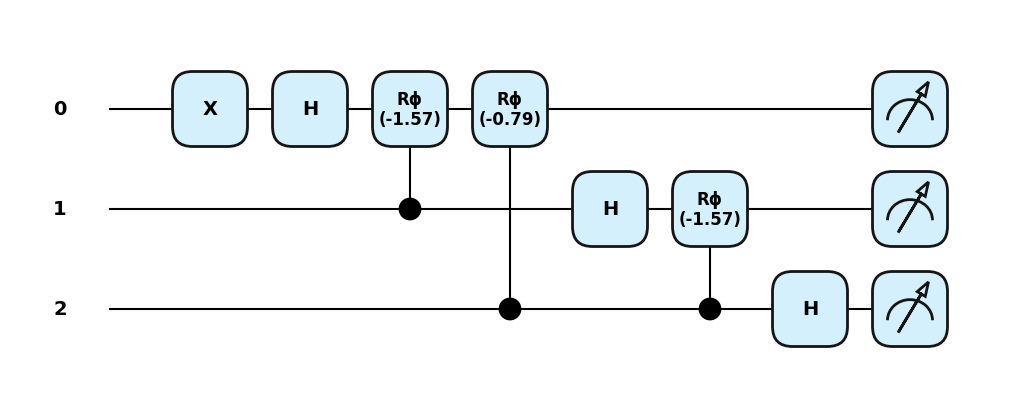

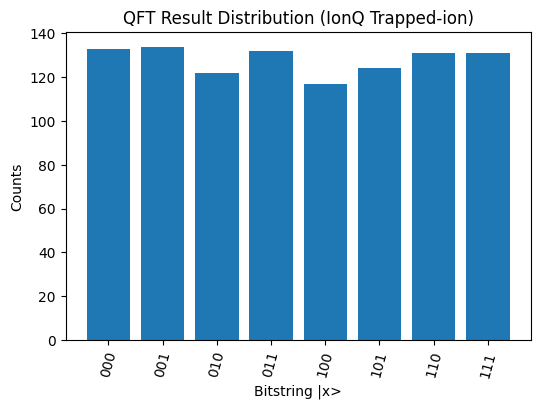

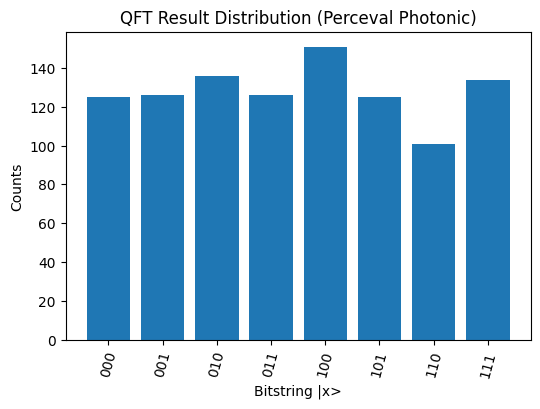

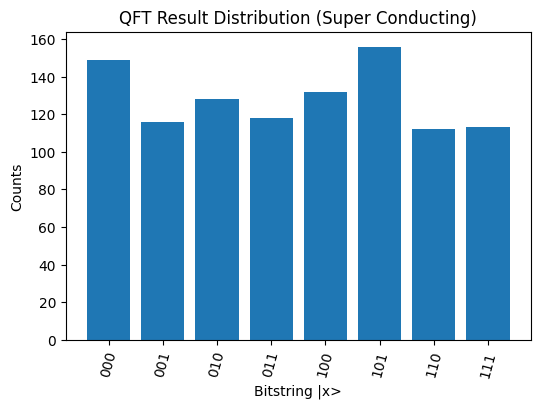

In [4]:
n = 3
config = [random.randint(0, 1) for _ in range(n)]
shots = 1024

print(f"The configuration is {config}")

result_trapped_ion = qft_trapped_ion(n, config, shots)
result_photonic = qft_photonic(n, config, shots)
result_super_conducting = qft_super_conducting(n, config, shots)

print(result_trapped_ion)
print(result_photonic)
print(result_super_conducting)

printHistogramCounts(result_trapped_ion, "QFT Result Distribution (IonQ Trapped-ion)")
printHistogramCounts(result_photonic, "QFT Result Distribution (Perceval Photonic)")
printHistogramCounts(result_super_conducting, "QFT Result Distribution (Super Conducting)")


## 5-Qubit Experiment

### 1. Run the experiment

The configuration is [0, 1, 0, 1, 0]


/home/hoon36/CS4134/.venv/lib/python3.12/site-packages/pennylane/devices/legacy_facade.py:177: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


QFT unitary on 32 modes:


<IPython.core.display.Math object>

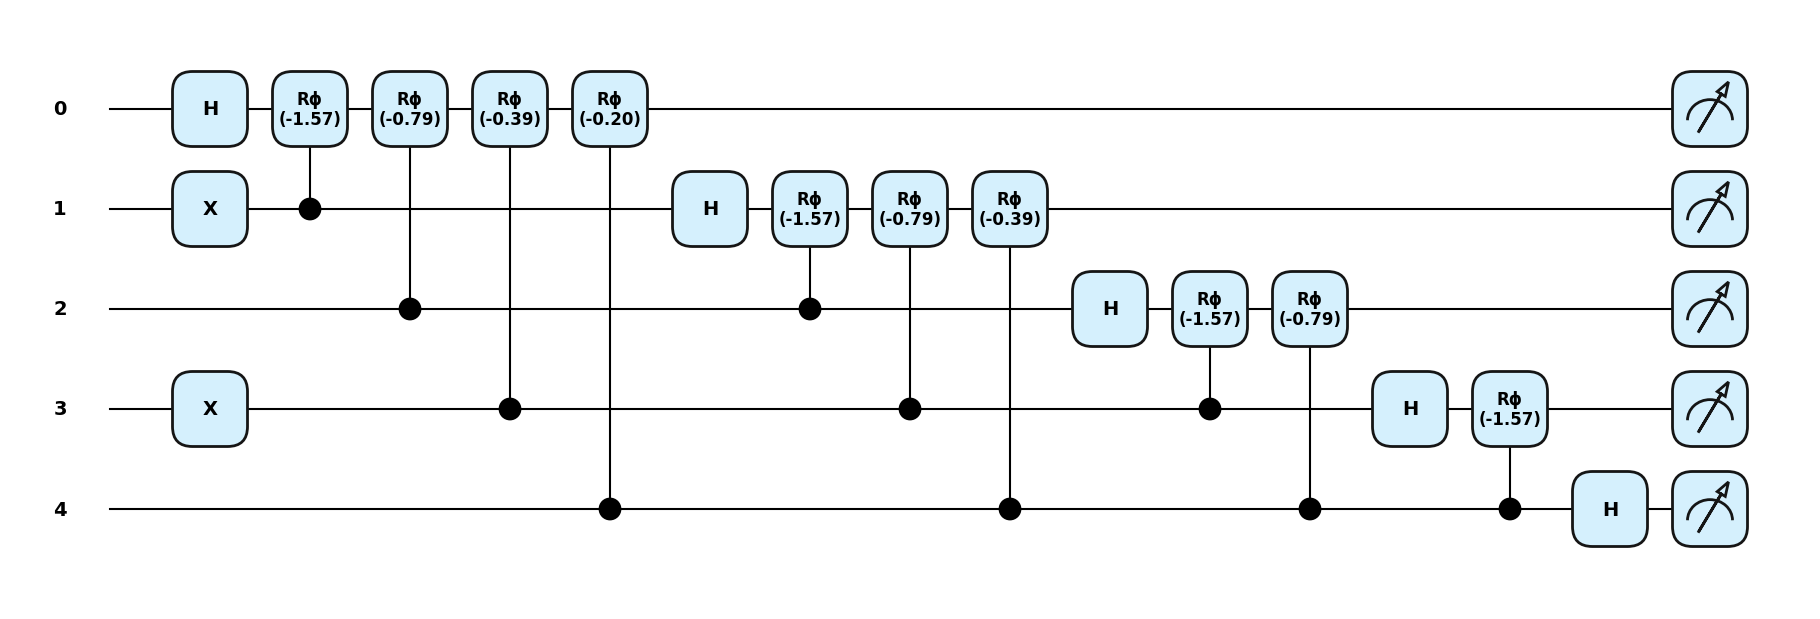

In [ ]:
n = 5
config = [random.randint(0, 1) for _ in range(n)]
shots = 1024

print(f"The configuration is {config}")

result_trapped_ion = qft_trapped_ion(n, config, shots)
result_photonic = qft_photonic(n, config, shots)
result_super_conducting = qft_super_conducting(n, config, shots)

### 2. QFT Result Distribution Representation

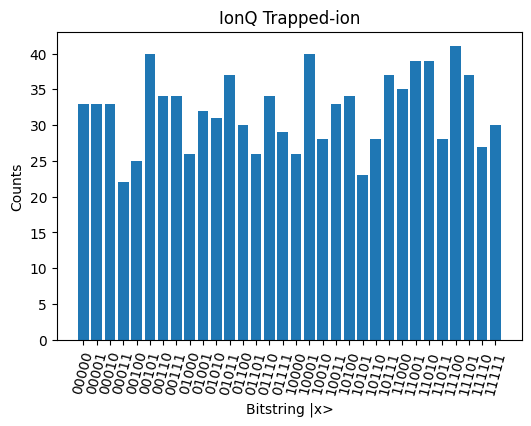

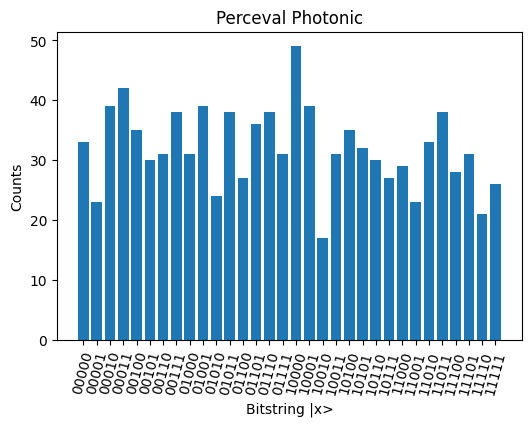

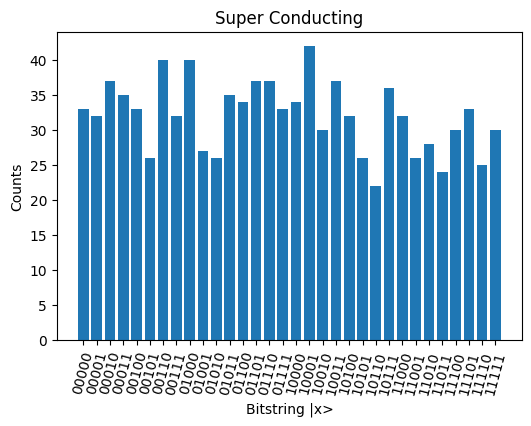

In [6]:
printHistogramCounts(result_trapped_ion, "IonQ Trapped-ion")
printHistogramCounts(result_photonic, "Perceval Photonic")
printHistogramCounts(result_super_conducting, "Super Conducting")


### 3. Probability Distribution

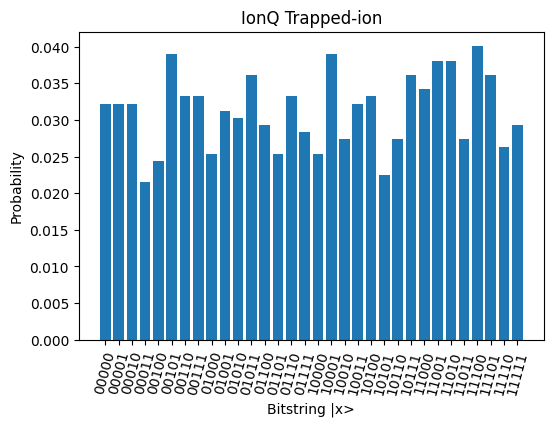

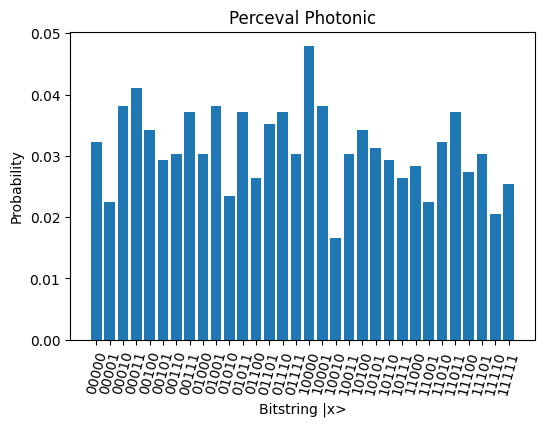

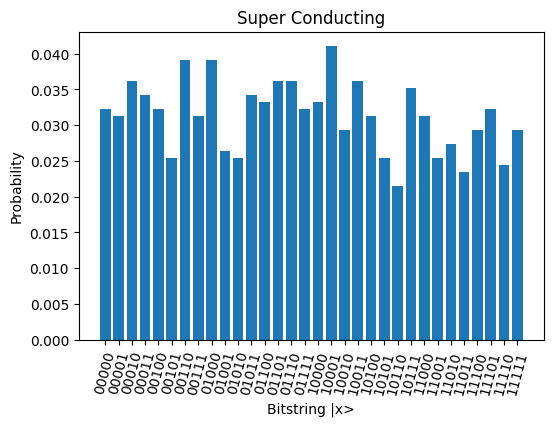

In [7]:
printHistogramProbs(result_trapped_ion, "IonQ Trapped-ion")
printHistogramProbs(result_photonic, "Perceval Photonic")
printHistogramProbs(result_super_conducting, "Super Conducting")